## Name: Gebril AbouBakr Ahmed
# The Sparks Foundation GRIP-Data Science & Business Amalytics Intern

# Task1: Prediction Using Supervised ML

### Percentage score prediction of students based on study hours

### Importing Libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Loading the data

In [6]:
data = pd.read_csv('http://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### STEP 2: Preparing the data

In [7]:
#find numbers of rows and columns
data.shape

(25, 2)

In [8]:
#to get more infomation 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
#to get descriptive statistics
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
#Checking the data if there any null or missing values
data.isna().sum()

Hours     0
Scores    0
dtype: int64

### STEP 3: Visualizing the data

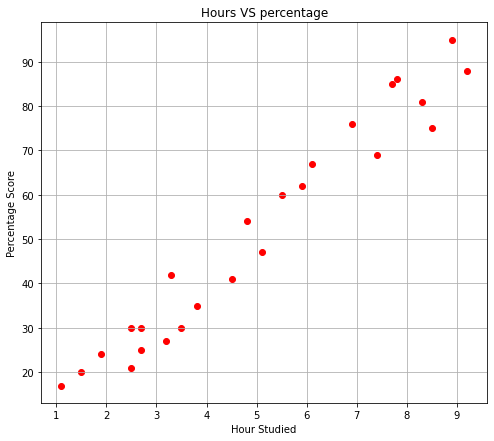

In [11]:
plt.figure(figsize=(8,7))
plt.scatter(x = 'Hours', y = 'Scores', color = 'Red', data = data)
plt.xlabel('Hour Studied')
plt.ylabel('Percentage Score')
plt.title('Hours VS percentage')
plt.grid()
plt.show()

In [12]:
#correlation between the varibles
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [13]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Dividing the data 

In [14]:
x = data.iloc[:,:1].values
y = data.iloc[:,1:].values

In [18]:
print(x)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [64]:
print(y)

[[21]
 [47]
 [27]
 [75]
 [30]
 [20]
 [88]
 [60]
 [81]
 [25]
 [85]
 [62]
 [41]
 [42]
 [17]
 [95]
 [30]
 [24]
 [67]
 [69]
 [30]
 [54]
 [35]
 [76]
 [86]]


### Training & Visualizing The model

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state = 0)

In [21]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [22]:
print('intercept :',linear_model.intercept_ , '\n','Slope:',linear_model.coef_)

intercept : [2.01816004] 
 Slope: [[9.91065648]]


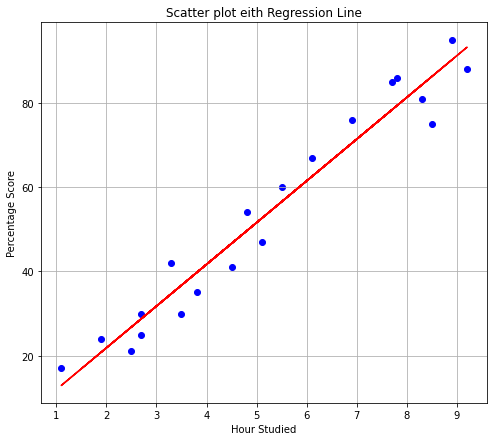

In [45]:
m=linear_model.coef_
c=linear_model.intercept_
line = m*x+c
plt.figure(figsize=(8,7))
plt.scatter(x_train,y_train, color = 'blue')
plt.plot(x,line,color='red')
plt.xlabel('Hour Studied')
plt.ylabel('Percentage Score')
plt.title('Scatter plot eith Regression Line')
plt.grid()
plt.show()

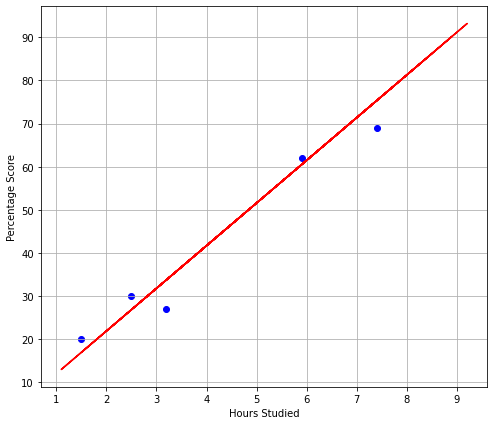

In [47]:
plt.figure(figsize=(8,7))
plt.scatter(x_test,y_test,color = 'blue')
plt.plot(x,line,color='red')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

### Making the predictions

In [25]:
y_pr = linear_model.predict(x_test)
print(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [26]:
#Main Data
y_test

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

In [27]:
#The predicted Data
y_pr

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [33]:
Comparison = pd.DataFrame({"Main":[y_test], "Predicted":[y_pr]})
Comparison                        

,Main,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398037], [33.73226077948984], [7..."


In [40]:
hours = 9.25
prediction=linear_model.predict([[hours]])
print("The predicted score if the student studies for", 'hours is', prediction[0])

The predicted score if the student studies for hours is [93.69173249]


### Evaluating The trained model 

In [49]:
print("Mean squared error:", metrics.mean_squared_error(y_test, y_pr))

Mean squared error: 21.5987693072174
